<table align="center">
   <td align="center"><a target="_blank" href="https://colab.research.google.com/github/ds5110/summer-2021/blob/master/03b-DataLoading.ipynb">
<img src="https://github.com/ds5110/summer-2021/raw/master/colab.png"  style="padding-bottom:5px;" />Run in Google Colab</a></td>
</table>

# 3b -- Data Loading

### Reading/References

* [Python for Data Analysis, 2nd Ed](https://github.com/wesm/pydata-book) (McKinney 2017) -- github
  * [ch05.ipynb](https://github.com/wesm/pydata-book/blob/2nd-edition/ch05.ipynb) getting started with pandas -- github
  * [ch06.ipynb](https://github.com/wesm/pydata-book/blob/2nd-edition/ch06.ipynb) data loading & storage -- github
  * [ch07.ipynb](https://github.com/wesm/pydata-book/blob/2nd-edition/ch07.ipynb) cleaning and preparation -- github


In [ ]:
# McKinney setup -- standard practice for a pro
# import numpy as np
# import pandas as pd
# PREVIOUS_MAX_ROWS = pd.options.display.max_rows
# pd.options.display.max_rows = 20
# np.random.seed(12345)
# import matplotlib.pyplot as plt
# plt.rc('figure', figsize=(10, 6))
# np.set_printoptions(precision=4, suppress=True)

In [2]:
import pandas as pd
import numpy as np

# Loading data with Pandas

There are many ways it can be done...

* `read_csv` -- load delimited data from a file, URL, or file-like object; use comma as default delimiter
* `read_fwf` -- data in fixed-width column format (i.e., no delimiters)
* `read_clipboard` -- version of read_csv that reads data from the clipboard; useful for converting tables from web pages
* `read_excel` -- tabular data from an Excel XLS or XLSX file
* `read_hdf` -- HDF5 files written by pandas
* `read_html` -- read all tables found in the given HTML document
* `read_json` -- data from a JSON (JavaScript Object Notation) string representation
* `read_msgpack` -- pandas data encoded using the MessagePack binary format
* `read_pickle` -- an arbitrary object stored in Python pickle format
* `read_sas` -- a SAS dataset stored in one of the SAS system’s custom storage formats
* `read_sql` -- the results of a SQL query (using SQLAlchemy) as a pandas DataFrame
* `read_stata` -- a dataset from Stata file format
* `read_feather` -- the Feather binary file format
  * https://wesmckinney.com/pages/about.html -- Feb 2020
  * https://wesmckinney.com/blog/feather-arrow-future/ -- Oct 2017
  * https://wesmckinney.com/blog/apache-arrow-pandas-internals/ -- Sep 2017

# Loading a CSV from github

Navigate to the file of interest and copy the "Raw" URL

* https://github.com/wesm/pydata-book/tree/2nd-edition/examples

In [ ]:
url = "https://github.com/wesm/pydata-book/raw/2nd-edition/examples/ex1.csv"

df = pd.read_csv(url)
df

a   b   c   d message
0  1   2   3   4   hello
1  5   6   7   8   world
2  9  10  11  12     foo

In [ ]:
# Loading a large file
url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/ex6.csv"

df = pd.read_csv(url)
df

one       two     three      four key
0     0.467976 -0.038649 -0.295344 -1.824726   L
1    -0.358893  1.404453  0.704965 -0.200638   B
2    -0.501840  0.659254 -0.421691 -0.057688   G
3     0.204886  1.074134  1.388361 -0.982404   R
4     0.354628 -0.133116  0.283763 -0.837063   Q
...        ...       ...       ...       ...  ..
9995  2.311896 -0.417070 -1.409599 -0.515821   L
9996 -0.479893 -0.650419  0.745152 -0.646038   E
9997  0.523331  0.787112  0.486066  1.093156   K
9998 -0.362559  0.598894 -1.843201  0.887292   G
9999 -0.096376 -1.012999 -0.657431 -0.573315   0

[10000 rows x 5 columns]

In [ ]:
# Reading a file in pieces

pd.read_csv(url, nrows=5)

one       two     three      four key
0  0.467976 -0.038649 -0.295344 -1.824726   L
1 -0.358893  1.404453  0.704965 -0.200638   B
2 -0.501840  0.659254 -0.421691 -0.057688   G
3  0.204886  1.074134  1.388361 -0.982404   R
4  0.354628 -0.133116  0.283763 -0.837063   Q

## Dates & times

As may be familiar by now, there are core Python capabilities, NumPy extensions, and Pandas conveniences built on top.

* [03.11 Working with Time Series.ipynb](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/03.11-Working-with-Time-Series.ipynb) -- a whirwind tour with an interesting example
* [pandas.Series.dt](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html) API reference docs -- pandas.pydata.org

In [ ]:
# the built-in datetime module allows you to create a date object
from datetime import datetime

dt = datetime(year=2015, month=7, day=4)

print(type(dt))
print(dt)

<class 'datetime.datetime'>
2015-07-04 00:00:00


In [ ]:
# the third-party dateutil module parses text into datetime.datetime objects
from dateutil import parser
date = parser.parse("4th of July, 2015")
print(type(date))
print(date)

<class 'datetime.datetime'>
2015-07-04 00:00:00


In [ ]:
# once you have a datetime object, you can do things like print the day of the week
date.strftime('%A')

'Saturday'

In [ ]:
# pandas Series.dt object
seconds_series = pd.Series(pd.date_range("2000-01-01", periods=3, freq="s"))

print(type(seconds_series))
print(seconds_series.dt.second)

<class 'pandas.core.series.Series'>
0    0
1    1
2    2
dtype: int64


# HTML

Read HTML tables into a list of DataFrame objects.

Also known as "web scraping"

A demo with dates...

In [ ]:
# Read tables in an HTML file

url = "https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/examples/fdic_failed_bank_list.html"

tables = pd.read_html(url)

print(type(tables))
print(len(tables))
print(type(tables[0]))

failures = tables[0]
failures.head()

<class 'list'>
1
<class 'pandas.core.frame.DataFrame'>


Bank Name  ...       Updated Date
0                   Allied Bank  ...  November 17, 2016
1  The Woodbury Banking Company  ...  November 17, 2016
2        First CornerStone Bank  ...  September 6, 2016
3            Trust Company Bank  ...  September 6, 2016
4    North Milwaukee State Bank  ...      June 16, 2016

[5 rows x 7 columns]

In [ ]:
# It's worth inspecting thing in detail, at least once.
print('1', type(failures['Closing Date'])) # a Series object pulled from the DF
print('2', type(failures['Closing Date'][0])) # a string
print('3', failures.loc[0, 'Closing Date']) # formatted as a date

close_timestamps = pd.to_datetime(failures['Closing Date'])

print('4', type(close_timestamps)) # a Series object
print('5', type(close_timestamps[0])) # a pandas Timestamp object
print('6', close_timestamps[0]) # a pandas Timestamp object (printed)

print('value counts:', close_timestamps.dt.year.value_counts())

close_timestamps.dt.year

close_timestamps[0]

1 <class 'pandas.core.series.Series'>
2 <class 'str'>
3 September 23, 2016
4 <class 'pandas.core.series.Series'>
5 <class 'pandas._libs.tslibs.timestamps.Timestamp'>
6 2016-09-23 00:00:00
value counts: 2010    157
2009    140
2011     92
2012     51
2008     25
2013     24
2014     18
2002     11
2015      8
2016      5
2004      4
2001      4
2007      3
2003      3
2000      2
Name: Closing Date, dtype: int64


Timestamp('2016-09-23 00:00:00')

# JSON

A web standard for data (as distinct from web scraping)


In [ ]:
import json

obj = """
{"name": "Wes",
 "places_lived": ["United States", "Spain", "Germany"],
 "pet": null,
 "siblings": [{"name": "Scott", "age": 30, "pets": ["Zeus", "Zuko"]},
              {"name": "Katie", "age": 38,
               "pets": ["Sixes", "Stache", "Cisco"]}]
}
"""

print(type(obj))

result = json.loads(obj)
print(type(result))

result

<class 'str'>
<class 'dict'>


{'name': 'Wes',
 'pet': None,
 'places_lived': ['United States', 'Spain', 'Germany'],
 'siblings': [{'age': 30, 'name': 'Scott', 'pets': ['Zeus', 'Zuko']},
  {'age': 38, 'name': 'Katie', 'pets': ['Sixes', 'Stache', 'Cisco']}]}

# Web API

* [Python requests](https://docs.python-requests.org/en/master/) can be used for 2-way communication to APIs
  * [Requests quickstart](https://docs.python-requests.org/en/latest/user/quickstart/) -- python-requests.org
* The typical response of modern Web APIs is JSON
* For example, github has a nice Web API for publicly accessible repositories
* Use the online documentation to get more information about various objects and methods...

In [ ]:
# Import some data from the Github web API
import requests

url = 'https://api.github.com/repos/pandas-dev/pandas/issues'

resp = requests.get(url)
print('1:', type(resp))
print('2:', resp)

# Parse the response as JSON
data = resp.json()

# inspect the data object
print('3:', type(data)) # list
print('4:', type(data[0])) # first element in the list
print('5:', data[0]['title']) # one attribute in that element
print('6:', data[0]) # that element in its entirety

# Create a DataFrame from the list
issues = pd.DataFrame(data, columns=['number', 'title',
                                    'labels', 'state'])
print('7: the dataframe:')
issues

1: <class 'requests.models.Response'>
2: <Response [200]>
3: <class 'list'>
4: <class 'dict'>
5: Cannot install pandas on Linux machine
6: {'url': 'https://api.github.com/repos/pandas-dev/pandas/issues/41687', 'repository_url': 'https://api.github.com/repos/pandas-dev/pandas', 'labels_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/41687/labels{/name}', 'comments_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/41687/comments', 'events_url': 'https://api.github.com/repos/pandas-dev/pandas/issues/41687/events', 'html_url': 'https://github.com/pandas-dev/pandas/issues/41687', 'id': 903219755, 'node_id': 'MDU6SXNzdWU5MDMyMTk3NTU=', 'number': 41687, 'title': 'Cannot install pandas on Linux machine', 'user': {'login': 'krishna3008', 'id': 74471606, 'node_id': 'MDQ6VXNlcjc0NDcxNjA2', 'avatar_url': 'https://avatars.githubusercontent.com/u/74471606?v=4', 'gravatar_id': '', 'url': 'https://api.github.com/users/krishna3008', 'html_url': 'https://github.com/krishna3008', 

number  ... state
0    41687  ...  open
1    41686  ...  open
2    41685  ...  open
3    41683  ...  open
4    41682  ...  open
5    41681  ...  open
6    41680  ...  open
7    41679  ...  open
8    41678  ...  open
9    41677  ...  open
10   41676  ...  open
11   41675  ...  open
12   41673  ...  open
13   41672  ...  open
14   41671  ...  open
15   41670  ...  open
16   41669  ...  open
17   41668  ...  open
18   41665  ...  open
19   41664  ...  open
20   41662  ...  open
21   41659  ...  open
22   41657  ...  open
23   41654  ...  open
24   41652  ...  open
25   41651  ...  open
26   41650  ...  open
27   41649  ...  open
28   41648  ...  open
29   41646  ...  open

[30 rows x 4 columns]

## USGS Earthquake data feed

* [Earthqake data from the USGS Hazards Program](https://earthquake.usgs.gov/earthquakes/feed/v1.0/geojson.php) -- usgs.gov

EXERCISE: How many earthquakes in the last day?

In [ ]:
url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_day.geojson"
resp = requests.get(url)
data = resp.json()
features = data['features']
len(features)



215

# Missing data

There are several ways to represent missing data.

* None -- native Python singleton object often used for missing data (slow)
* [np.nan](https://numpy.org/doc/stable/reference/constants.html?highlight=nan#numpy.nan) -- IEEE floating point representation of "Not A Number" (fast)
* pd.NA -- pandas._libs.missing.NAType (special object)

In [4]:
# None is a "NoneType", np.nan is a float, pd.NA is a special object
print(type(3))
print(type(3.14159))
print(type(np.nan))
print(type(None))
print(type(pd.NA))

# If you add a missing data attribute, you'll change the array type...
arr = np.array([1, 42])
print('arr.dtype (before):', arr.dtype)
#arr = arr + None  # this throws a TypeError
arr = np.array([1, 42]) + pd.NA
print('arr.dtype (during):', arr.dtype)
arr = np.array([1, 42]) + np.nan # this works, but converts the dtype
print('arr.dtype (after):', arr.dtype)

<class 'int'>
<class 'float'>
<class 'float'>
<class 'NoneType'>
<class 'pandas._libs.missing.NAType'>
arr.dtype (before): int64
arr.dtype (during): object
arr.dtype (after): float64


In [27]:
# Be careful when checking a numpy array for missing data using .isnan()
# Try each of these in succession...
arr = np.array([1, 2, 5]) # .isnan() will return an array of 3 False values
#arr = np.array(['hello', 'world']) # .isnan() will throw an Error with strings
#arr = np.array([1,2, None]) # This will also throw an error because None is an object
#arr = np.array([1,2, np.nan]) # This works!! (because the array contains **all** "numeric" values)

# Check for nan
np.isnan(arr)

array([False, False, False])

In [31]:
# This array is dtype='float64'
a = np.array([np.nan])
print('1:', a, a.dtype)

# This array of strings is dtype='<U5', which is unicode
a = np.array(['hello', 'world'])
print('2:', a, a.dtype)

# Q: This array of strings with a nan is dtype...? (Compare 1 & 3)
a = np.array(['hello', 'world', np.nan])
# print('3:', a, a.dtype)

1: [nan] float64
2: ['hello' 'world'] <U5


In [32]:
a = np.array(['hello', 'world', None]) # dtype: object
print(a, a.dtype)
print(type(None))

['hello' 'world' None] object
<class 'NoneType'>


# Missing data in Pandas

* Pandas has its own pd.NA (relatively new)
* In Pandas, NaN and None are nearly interchangeable, with sometimes surprising behavior
* [Working with missing data](https://pandas.pydata.org/pandas-docs/stable/user_guide/missing_data.html) -- pandas.pydata.org

In [ ]:
# Pandas is more forgiving, but some results might be surprising
arr = np.array(['aardvark', pd.NA, np.nan, None])
print(pd.isnull(arr))

arr

[False  True  True  True]


array(['aardvark', <NA>, nan, None], dtype=object)

In [ ]:
# Notice that this Series is dtype: Int64
arr = pd.Series([2, pd.NA], dtype="Int64")
arr

0       2
1    <NA>
dtype: Int64

In [ ]:
# And NA has its own type
type(pd.NA)

pandas._libs.missing.NAType

In [ ]:
# Pandas converts None to np.nan in this Series with dtype: float64
pd.Series([None, 42])

0     NaN
1    42.0
dtype: float64

In [ ]:
# Pandas converts the Series to dtype: object if it has a pd.NA
pd.Series([42, pd.NA])

0      42
1    <NA>
dtype: object

In [ ]:
# But you can specify dtype="Int64"
pd.Series([42, pd.NA], dtype="Int64")

0      42
1    <NA>
dtype: Int64

# Handling missing values

Methods for dealing with missing data in Pandas

* `isnull()`: Generate a boolean mask indicating missing values
* `notnull()`: Opposite of isnull()
* `dropna()`: Return a filtered version of the data
* `fillna()`: Return a copy of the data with missing values filled or imputed

In [ ]:
# These methods work with Pandas Series
series = pd.DataFrame([1, np.nan, 'hello', None])

# The return value is a copy (see reference docs)
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dropna.html
series.dropna()

0
0      1
2  hello

In [ ]:
# They also work with a Pandas DataFrame
df = pd.DataFrame([[1,      np.nan, 2],
                   [2,      3,      5],
                   [pd.NA, None, np.nan],
                   [np.nan, 4,      6]])
df

0    1    2
0     1  NaN  2.0
1     2  3.0  5.0
2  <NA>  NaN  NaN
3   NaN  4.0  6.0

In [ ]:
# By default -- the entire row is dropped if it contains an NA
df.dropna()

0    1    2
1  2  3.0  5.0

In [ ]:
# You can override the default behavior, and drop columns instead
df.dropna(axis=1)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3]

In [ ]:
# You can also specify that all elements must be NA before dropping a row/column
df.dropna(how='all')

0    1    2
0    1  NaN  2.0
1    2  3.0  5.0
3  NaN  4.0  6.0

In [ ]:
# You can fill null values in any of several ways. With a single value...
df.fillna('42')

0   1   2
0   1  42   2
1   2   3   5
2  42  42  42
3  42   4   6

In [ ]:
# The previous value (default: along index=0)
df.fillna(method='bfill')

0    1    2
0  1.0  3.0  2.0
1  2.0  3.0  5.0
2  NaN  4.0  6.0
3  NaN  4.0  6.0

In [ ]:
# The previous value along axis=1
df.fillna(method='bfill', axis=1)

0    1    2
0  1.0  2.0  2.0
1  2.0  3.0  5.0
2  NaN  NaN  NaN
3  4.0  4.0  6.0

# Missing penguins

In [ ]:
import seaborn as sns

# load the "penguins" dataset from seaborn
penguins = sns.load_dataset("penguins")

# inspect the dataset (note: there are some NaNs)
penguins

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    Male

[344 rows x 7 columns]

In [ ]:
penguins.isnull()
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

## Q: Where are the missing penguins?

Masking with the result of `.isnull()`

In [ ]:
df = penguins[penguins['sex'].isnull()]
df

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g  sex
3    Adelie  Torgersen             NaN  ...                NaN          NaN  NaN
8    Adelie  Torgersen            34.1  ...              193.0       3475.0  NaN
9    Adelie  Torgersen            42.0  ...              190.0       4250.0  NaN
10   Adelie  Torgersen            37.8  ...              186.0       3300.0  NaN
11   Adelie  Torgersen            37.8  ...              180.0       3700.0  NaN
47   Adelie      Dream            37.5  ...              179.0       2975.0  NaN
246  Gentoo     Biscoe            44.5  ...              216.0       4100.0  NaN
286  Gentoo     Biscoe            46.2  ...              214.0       4650.0  NaN
324  Gentoo     Biscoe            47.3  ...              216.0       4725.0  NaN
336  Gentoo     Biscoe            44.5  ...              217.0       4875.0  NaN
339  Gentoo     Biscoe             NaN  ...                NaN          NaN  NaN

[11 rows x 7 columns]

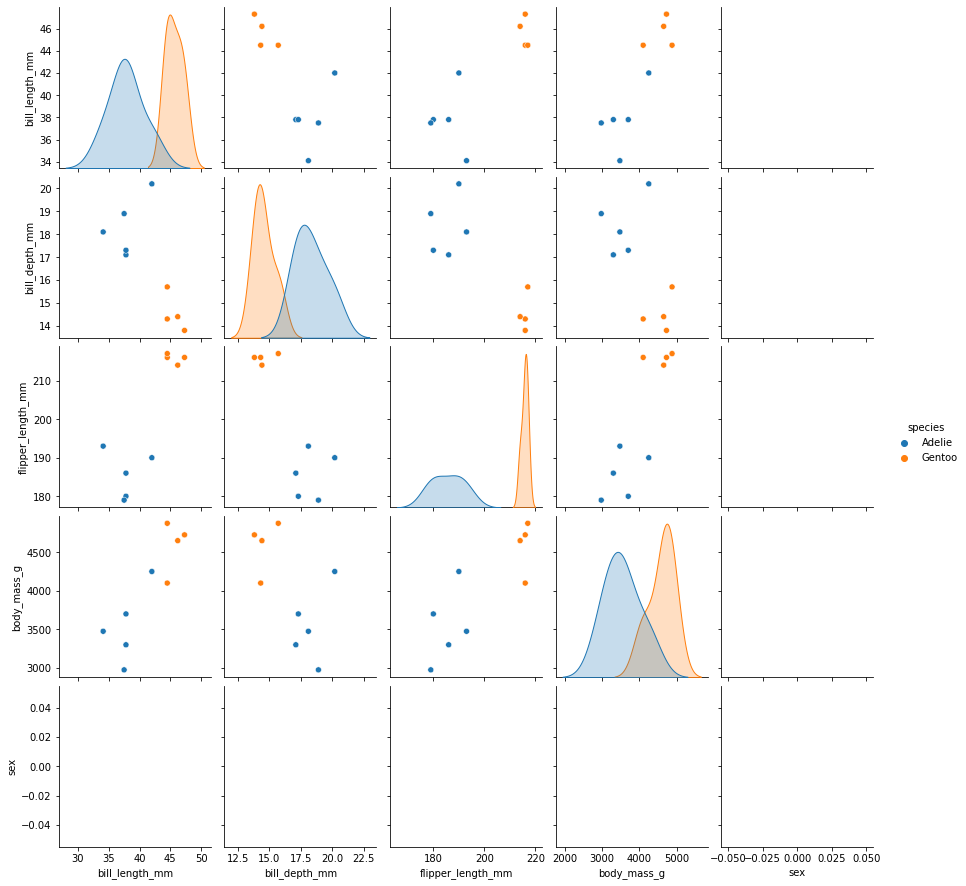

In [ ]:
sns.pairplot(df, hue="species");

### Q: Why does the plot above have 5 columns & rows, whereas the next one has only 4?

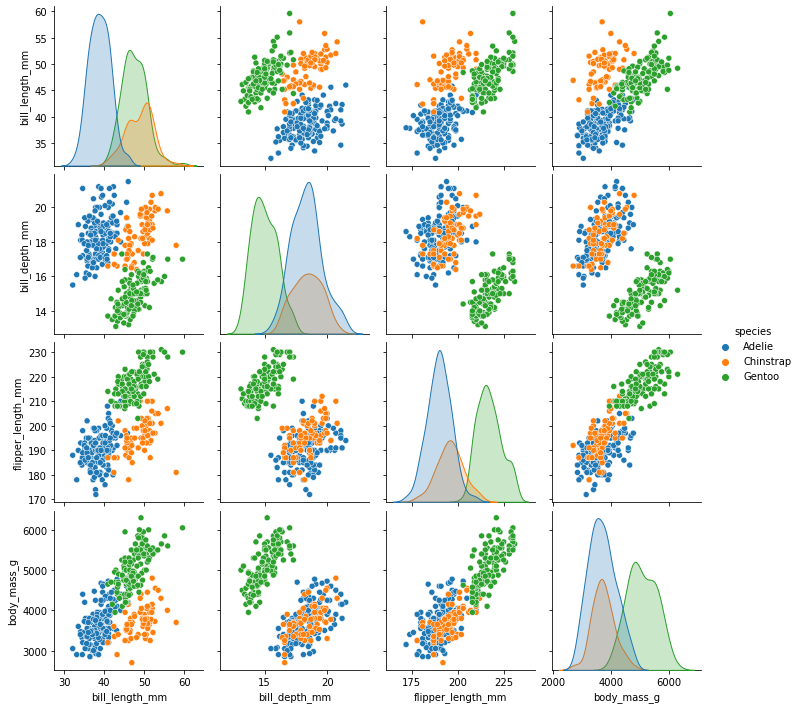

In [ ]:
sns.pairplot(penguins, hue="species");

In [ ]:
# Inspect all the penguins
penguins

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g     sex
0    Adelie  Torgersen            39.1  ...              181.0       3750.0    Male
1    Adelie  Torgersen            39.5  ...              186.0       3800.0  Female
2    Adelie  Torgersen            40.3  ...              195.0       3250.0  Female
3    Adelie  Torgersen             NaN  ...                NaN          NaN     NaN
4    Adelie  Torgersen            36.7  ...              193.0       3450.0  Female
..      ...        ...             ...  ...                ...          ...     ...
339  Gentoo     Biscoe             NaN  ...                NaN          NaN     NaN
340  Gentoo     Biscoe            46.8  ...              215.0       4850.0  Female
341  Gentoo     Biscoe            50.4  ...              222.0       5750.0    Male
342  Gentoo     Biscoe            45.2  ...              212.0       5200.0  Female
343  Gentoo     Biscoe            49.9  ...              213.0       5400.0    Male

[344 rows x 7 columns]

In [ ]:
# Inspect the missing penguins
df

species     island  bill_length_mm  ...  flipper_length_mm  body_mass_g  sex
3    Adelie  Torgersen             NaN  ...                NaN          NaN  NaN
8    Adelie  Torgersen            34.1  ...              193.0       3475.0  NaN
9    Adelie  Torgersen            42.0  ...              190.0       4250.0  NaN
10   Adelie  Torgersen            37.8  ...              186.0       3300.0  NaN
11   Adelie  Torgersen            37.8  ...              180.0       3700.0  NaN
47   Adelie      Dream            37.5  ...              179.0       2975.0  NaN
246  Gentoo     Biscoe            44.5  ...              216.0       4100.0  NaN
286  Gentoo     Biscoe            46.2  ...              214.0       4650.0  NaN
324  Gentoo     Biscoe            47.3  ...              216.0       4725.0  NaN
336  Gentoo     Biscoe            44.5  ...              217.0       4875.0  NaN
339  Gentoo     Biscoe             NaN  ...                NaN          NaN  NaN

[11 rows x 7 columns]

<class 'float'>
nan
object
<class 'float'>
nan
object


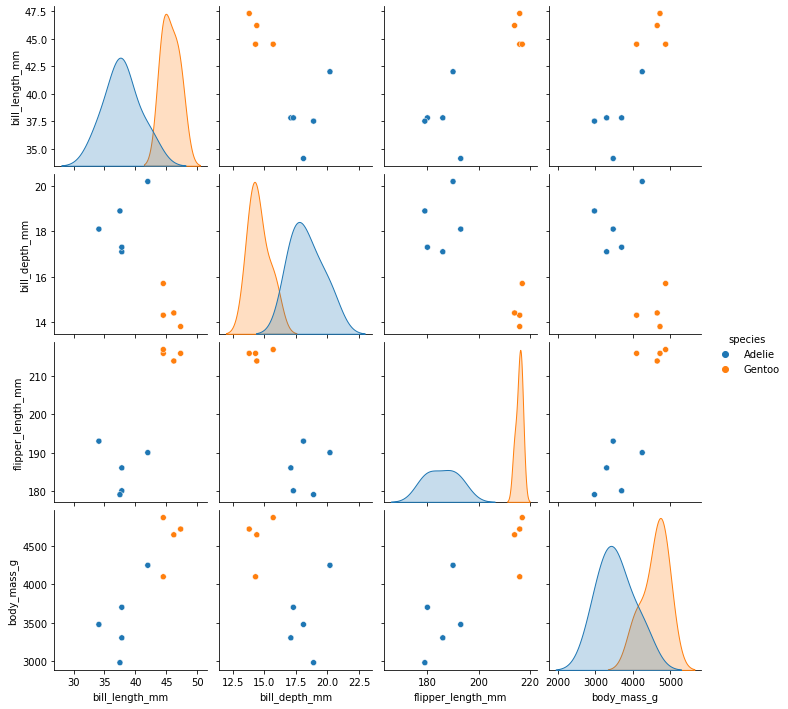

In [ ]:
# A: Specify variables within data to use, otherwise use every column with a numeric datatype
# This comes from API ref docs: https://seaborn.pydata.org/generated/seaborn.pairplot.html
# 5th variable because missing penguins are all floats (nan), not float/string combination
# Fix things by specifying "vars"
vars = ["bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]
sns.pairplot(df, hue="species", vars=vars)
# all penguins
print(type(penguins.loc[3, 'sex']))
print(penguins.loc[3, 'sex'])
print(penguins['sex'].dtype)

# missing penguins
print(type(df.loc[3, 'sex']))
print(df.loc[3, 'sex'])
print(df['sex'].dtype)

Note how much you learn with this quick, attractive and informative visualization!!

NaNs appear only in 2 of the 3 species, and in roughly equal number.  What other patterns do you notice? Look at the printout and imagine getting the same information from the printout.